# Лабораторная работа 1

# Хохлова Анастасия Алексеевна 6409

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [10]:
# Импортируем библиотеки

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from datetime import datetime

#Импортируем датасет
from keras.datasets import cifar10

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

##### 1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [11]:
cifar = cifar10.load_data()

Разделим выборку на тренировочную и тестовую, посмотрим её размер

In [12]:
from scripts.data_utils import load_CIFAR10

# Загрузка данных
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

x_train, y_train, x_test, y_test = load_CIFAR10(cifar10_dir)


print('Training data shape: ', x_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


##### 1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


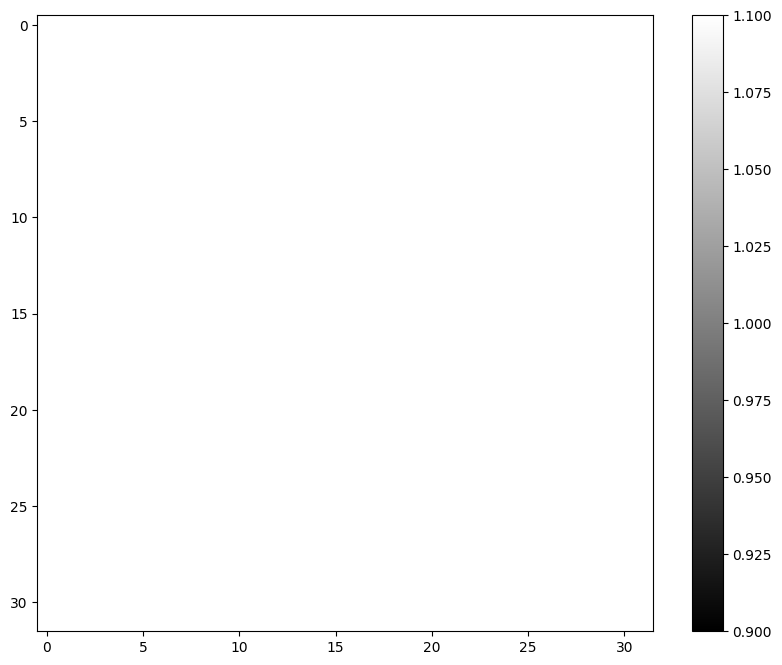

In [13]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

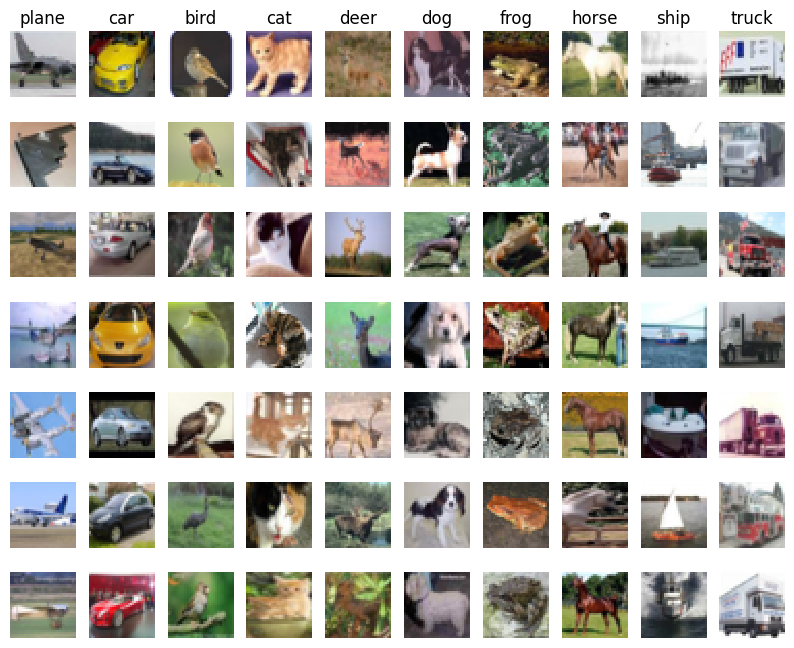

In [14]:
mapping_labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
n_classes = len(mapping_labels)
n_samples = 7

for class_index, class_name in enumerate(mapping_labels):
    class_indexes = np.random.choice(np.flatnonzero(y_train == class_index), n_samples, replace=False)
    for i, idx in enumerate(class_indexes):
        plt_idx = i * n_classes + class_index + 1
        plt.subplot(n_samples, n_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(class_name)
plt.show()

##### 1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [15]:
# Берем срез для ускорения вычислений
x_train = x_train[0:5000]
y_train = y_train[0:5000]
x_test = x_test[0:1000]
y_test = y_test[0:1000]

# Преобразование в одномерный массив
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

##### 1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [16]:
from scripts.classifiers.k_nearest_neighbor import KNearestNeighbor

classifier_KNN = KNearestNeighbor()
classifier_KNN.train(x_train, y_train)

##### 1.5 Выполните классификацию на тестовой выборке

In [17]:
from time import time

# пробуем разные алгоритмы, замеряем время выполнения
start_time2 = time()
dists_two_loops = classifier_KNN.compute_distances_two_loops(x_test)
time_two_loops = time() - start_time2

print('time_two_loops', time_two_loops)


start_time3 = time()
dists_one_loop = classifier_KNN.compute_distances_one_loop(x_test)
time_one_loop = time() - start_time3

print('time_one_loop', time_one_loop)


start_time4 = time()
dists_no_loops = classifier_KNN.compute_distances_no_loops(x_test)
time_no_loops = time() - start_time4

print('time_no_loops', time_no_loops)

time_two_loops 50.27420973777771
time_one_loop 135.4989800453186
time_no_loops 0.3522529602050781


##### 1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 

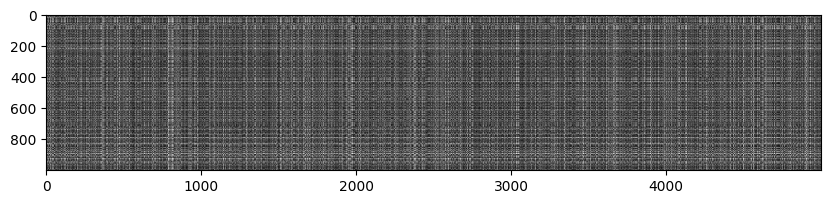

In [18]:
plt.imshow(dists_two_loops, interpolation = 'none')
plt.show()

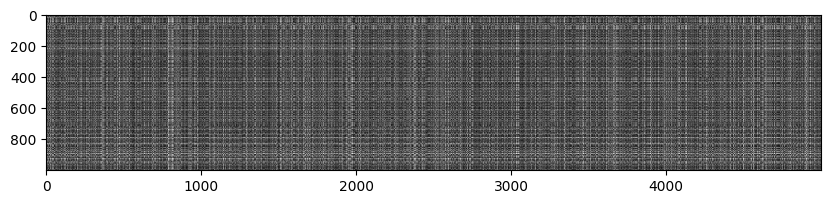

In [19]:
plt.imshow(dists_one_loop, interpolation = 'none')
plt.show()

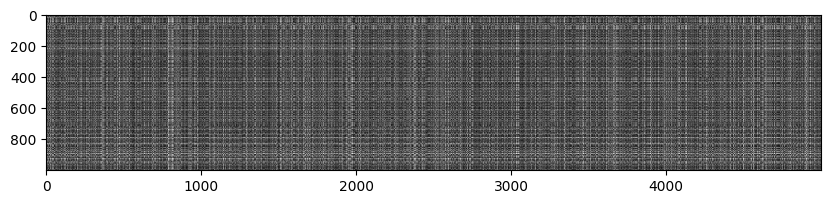

In [20]:
plt.imshow(dists_no_loops, interpolation = 'none')
plt.show()

##### 1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.

In [23]:
y_pred = classifier_KNN.predict_labels(dists_no_loops, k = 2)
correctly_classified = np.sum(y_pred == y_test) / len(y_pred)
print('Доля верно классифицированных изображений из тестовой выборки: ', correctly_classified)

y_pred = classifier_KNN.predict_labels(dists_one_loop, k = 2)
correctly_classified = np.sum(y_pred == y_test) / len(y_pred)
print('Доля верно классифицированных изображений из тестовой выборки: ', correctly_classified)

y_pred = classifier_KNN.predict_labels(dists_two_loops, k = 2)
correctly_classified = np.sum(y_pred == y_test) / len(y_pred)
print('Доля верно классифицированных изображений из тестовой выборки: ', correctly_classified)

Доля верно классифицированных изображений из тестовой выборки:  0.229
Доля верно классифицированных изображений из тестовой выборки:  0.229
Доля верно классифицированных изображений из тестовой выборки:  0.229


##### 1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

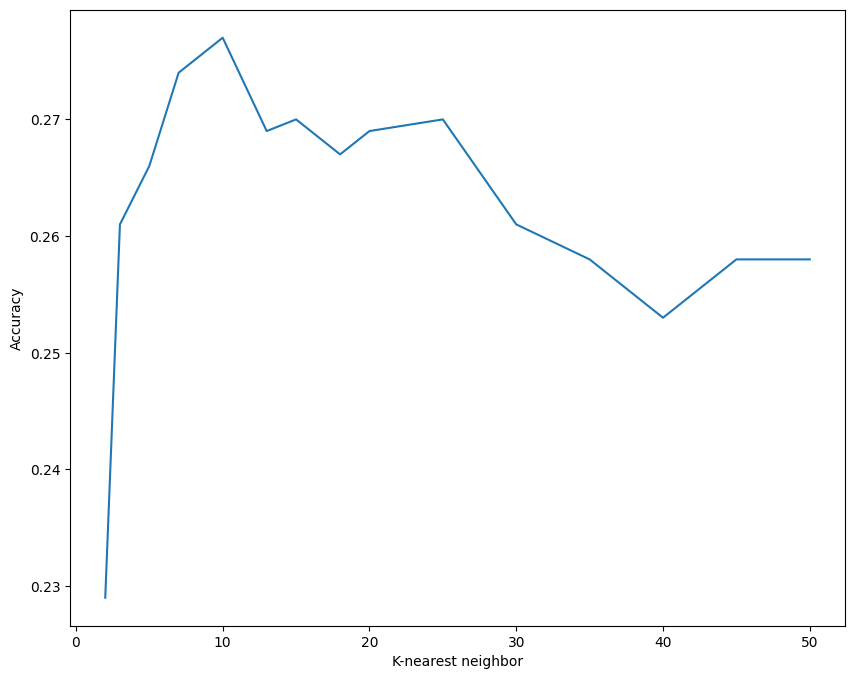

In [28]:
neighbors_count_arr = [2,3,5,7,10,13,15,18,20,25,30,35,40,45,50]
accuracy = {}
for neighbor_count in neighbors_count_arr:
    knn_classifier = KNearestNeighbor()
    knn_classifier.train(x_train, y_train)
    dists_two_loops = knn_classifier.compute_distances_no_loops(x_test)
    y_pred = knn_classifier.predict_labels(dists_two_loops, k = neighbor_count)
    accuracy[neighbor_count] = np.sum(y_pred == y_test) / len(y_pred)

plt.plot(neighbors_count_arr, accuracy.values())
plt.xlabel("K-nearest neighbor")
plt.ylabel("Accuracy")
plt.show()

##### 1.9 Выберите лучшее значение параметра k на основе кросс-валидации.

In [29]:
best_neighbors_count = max(accuracy, key = accuracy.get)
print('Оптимальное число соседей:', best_neighbors_count)

Оптимальное число соседей: 10


##### 1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.

In [31]:
knn_classifier_best = KNearestNeighbor()
knn_classifier_best.train(x_train, y_train)

y_pred_no_loops = knn_classifier_best.predict(x_test, best_neighbors_count, num_loops=0)
correctly_classified_no_loops = np.sum(y_pred_no_loops == y_test) / len(y_pred_no_loops)

y_pred_one_loop = knn_classifier_best.predict(x_test, best_neighbors_count, num_loops=1)
correctly_classified_one_loop = np.sum(y_pred_one_loop == y_test) / len(y_pred_one_loop)

y_pred_two_loops = knn_classifier_best.predict(x_test, best_neighbors_count, num_loops=2)
correctly_classified_two_loops = np.sum(y_pred_two_loops == y_test) / len(y_pred_two_loops)

print(f'Доля верно классифицированных при количестве соседей: {best_neighbors_count}, количество циклов: {0} - {correctly_classified_no_loops}')
print(f'Доля верно классифицированных при количестве соседей: {best_neighbors_count}, количество циклов: {1} - {correctly_classified_one_loop}')
print(f'Доля верно классифицированных при количестве соседей: {best_neighbors_count}, количество циклов: {2} - {correctly_classified_two_loops}')

##### 1.11 Сделайте выводы по результатам 1 части задания.

Вывод: Количество соседей влияет на точность работы классификатора k-ближайших соседей. С увеличением числа соседей улучшается точность, однако увеличивается время обучения. Также увеличивается риск переобучения при большом количестве соседей.

## 3.  Построение softmax-классификатора

##### 3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [ ]:
# Снова определим тренировочную и тестовую выборки
(x_train, y_train), (x_test, y_test) = cifar

x_val = x_train[49000:50000]
y_val = y_train[49000:50000]

x_train = x_train[0:49000]
y_train = y_train[0:49000]

x_dev = x_test[9000:10000]
y_dev = y_test[9000:10000]

x_test = x_test[0:9000]
y_test = y_test[0:9000]

x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
x_val = np.reshape(x_val, (x_val.shape[0], -1))
x_dev = np.reshape(x_dev, (x_dev.shape[0], -1))
y_train = np.reshape(y_train, (y_train.shape[0],))
y_val = np.reshape(y_val, (y_val.shape[0],))
y_test = np.reshape(y_test, (y_test.shape[0],))
y_dev = np.reshape(y_dev, (y_dev.shape[0],))


print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)
print (x_val.shape, y_val.shape)
print (x_dev.shape, y_dev.shape)

(49000, 3072) (49000,)
(9000, 3072) (9000,)
(1000, 3072) (1000,)
(1000, 3072) (1000,)


##### 3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


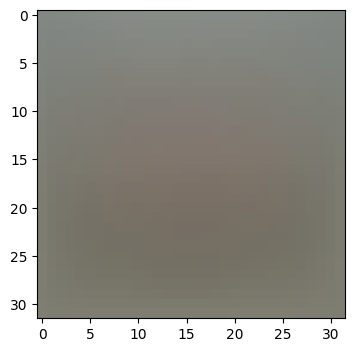

In [ ]:
mean_image = np.mean(x_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize = (4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()

##### 3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

In [ ]:
x_train = x_train - mean_image
x_val = x_val - mean_image
x_test = x_test - mean_image
x_dev = x_dev - mean_image

x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])
x_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))])
x_val = np.hstack([x_val, np.ones((x_val.shape[0], 1))])
x_dev = np.hstack([x_dev, np.ones((x_dev.shape[0], 1))])


print(x_train.shape, x_test.shape, x_val.shape, x_dev.shape)

(49000, 3073) (9000, 3073) (1000, 3073) (1000, 3073)


##### 3.4 Реализуйте функции в classifiers/softmax.py

In [ ]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

W = np.random.randn(3073, 10) * 0.0001 
loss, grad = softmax_loss_naive(W, x_dev, y_dev, 0.0)

print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.367886
sanity check: 2.302585


##### 3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [ ]:
loss, grad = softmax_loss_naive(W, x_dev, y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, x_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, x_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, x_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -2.027681 analytic: -2.027681, relative error: 6.155268e-09
numerical: -2.056582 analytic: -2.056582, relative error: 1.482907e-09
numerical: -1.002507 analytic: -1.002507, relative error: 2.837650e-09
numerical: 1.417360 analytic: 1.417360, relative error: 5.320852e-08
numerical: 0.574183 analytic: 0.574183, relative error: 5.353523e-08
numerical: -0.825936 analytic: -0.825936, relative error: 6.093867e-08
numerical: 0.401917 analytic: 0.401917, relative error: 1.200542e-07
numerical: -2.060342 analytic: -2.060342, relative error: 7.357748e-09
numerical: -0.879414 analytic: -0.879414, relative error: 7.311874e-09
numerical: -2.148191 analytic: -2.148191, relative error: 3.649399e-09
numerical: 3.785011 analytic: 3.785011, relative error: 1.062947e-08
numerical: 2.308744 analytic: 2.308744, relative error: 1.903385e-08
numerical: -4.267346 analytic: -4.267346, relative error: 1.328233e-08
numerical: 1.203886 analytic: 1.203886, relative error: 3.017173e-08
numerical: -1.2261

##### 3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [ ]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, x_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, x_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.367886e+00 computed in 0.219947s
vectorized loss: 2.367886e+00 computed in 0.002521s
Loss difference: 0.000000
Gradient difference: 0.000000


##### 3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

##### 3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [ ]:
from scripts.classifiers.linear_classifier  import Softmax

softmax = Softmax()
tic = time.time()
loss_hist = softmax.train(x_train[:5000], y_train[:5000], learning_rate=1e-6, reg=2.5e4, num_iters=300, batch_size=200, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

y_train_pred = np.argmax(softmax.predict(x_train[:5000]), axis=-1)
print('training accuracy: %f' % (np.mean(y_train[:5000] == y_train_pred), ))
y_val_pred = np.argmax(softmax.predict(x_val), axis=-1)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

iteration 0 / 300: loss 393.788511
iteration 100 / 300: loss 4.479785
iteration 200 / 300: loss 2.010793
That took 0.603605s
training accuracy: 0.103800
validation accuracy: 0.000000


##### 3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [ ]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]
results = {}
best_accuracy = -1

for rate in learning_rates:
    for strength in regularization_strengths:
        softmax_classifier = Softmax()
        softmax_classifier.train(x_train, y_train)
        y_train_pred = softmax_classifier.predict(x_train)
        y_val_pred = softmax_classifier.predict(x_val)
        train_accuracy = np.sum(y_train_pred == y_train) / len(y_train)
        val_accuracy = np.sum(y_val_pred == y_val) / len(y_val)
        results[(rate, strength)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy

for rate, strength in sorted(results):
    train_accuracy, val_accuracy = results[(rate, strength)]
    print(f'Rate: {rate}, regularization_strength: {strength}, train_accuracy: {train_accuracy}, val_accuracy: {val_accuracy}')
    
print(f'Best accuracy: {best_accuracy}')


c:\Users\user\Desktop\Neural\scripts\classifiers\softmax.py:70: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(correct_class_probs))


Rate: 1e-07, regularization_strength: 25000.0, train_accuracy: 0.2844285714285714, val_accuracy: 0.257
Rate: 1e-07, regularization_strength: 50000.0, train_accuracy: 0.2746734693877551, val_accuracy: 0.268
Rate: 5e-05, regularization_strength: 25000.0, train_accuracy: 0.26240816326530614, val_accuracy: 0.262
Rate: 5e-05, regularization_strength: 50000.0, train_accuracy: 0.27761224489795916, val_accuracy: 0.304
Best accuracy: 0.304


##### 3.10 Сделайте выводы по третьей части задания

В третьей части задания мы создали методы для обучения линейных классификаторов с применением различных методов оптимизации, таких как стохастический градиентный спуск. Мы реализовали и обучили классификаторы, включая линейный и Softmax, на тренировочном наборе данных.

Основные действия в этой части задания включали в себя:

+ Написание функции потерь и градиента для линейного и Softmax классификаторов.
+ Обучение классификаторов с использованием стохастического градиентного спуска.
+ Выбор оптимальных значений скорости обучения и коэффициента регуляризации с помощью кросс-валидации.
+ Оценка точности классификатора на тестовом наборе данных с выбранными параметрами.

Выводы:

+ Классификаторы Linear и Softmax были успешно обучены на тренировочном наборе данных.
+ Использование кросс-валидации помогло выбрать оптимальные параметры и улучшить производительность модели на валидационном и тестовом наборах данных.
+ Правильная реализация функции потерь и градиентов является ключевым фактором для успешного обучения.
+ Эти шаги и навыки играют важную роль в машинном обучении и глубоком обучении, так как позволяют эффективно обучать и оценивать модели для классификации.